# Google News Sentiment - Stock Return Prediction Model

#### Creator: Brian Au, HKUST QFIN
#### This program is part of the alternative data analysis pipeline for equity research. It fetches google news titles, quantify & analyze the sentiment, then use the sentiment score to predict the daily stock returns using a LASSO-regularized Linear Regression Model.

#### The model, evaluation, suggestions, and comparison dataframe are useful output for equity research pipeline.

In [1]:
from sentiment_fetch import *
from gn_analytics import *
from gn_lasso_model import *
import pandas as pd
import numpy as np
from pygooglenews import GoogleNews
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [33]:
query = "Tesla"
ticker = "TSLA"
start_date = "2025-06-30"
end_date = "2025-12-01"
plt.style.use('classic')

***
# Data Fetching and Preparation

### Key Function 1: sentiment_analysis 

The function takes in:

1) query: The target keyword
2) start_date
3) end_date
4) label/score: label gives "POSITIVE" or "NEGATIVE"; score gives a confidence score for "POSITIVE" sentiment.

and gives out a dataframe with the top news and sentiment scores/labels for each day



In [34]:
df = sentiment_analysis(query,start_date,end_date,"label")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use mps:0


In [35]:
df

,2025-6-30,2025-7-1,2025-7-2,2025-7-3,2025-7-4,2025-7-5,2025-7-6,2025-7-7,2025-7-8,2025-7-9,...,2025-11-22 Analysis,2025-11-23 Analysis,2025-11-24 Analysis,2025-11-25 Analysis,2025-11-26 Analysis,2025-11-27 Analysis,2025-11-28 Analysis,2025-11-29 Analysis,2025-11-30 Analysis,2025-12-1 Analysis
0,My Secret Tesla Master Plan (Part 4) - Electrek,China's BYD poised to overtake Tesla in 2025 E...,Tesla reports record sales plunge from last ye...,Tesla (NASDAQ: TSLA) Stock Price Prediction an...,Tesla Set for 2026 Catalysts as Baird Reaffirm...,Tesla stock slips in premarket after Tesla pos...,"Trump calls Musk's formation of new party ""rid...",Tesla was forced to reimburse Full Self-Drivin...,Tesla is in deeper trouble than you think - CNN,The Deep Story On The Waymo Vs Tesla Robotaxi ...,...,NEGATIVE,NEGATIVE,NEGATIVE,POSITIVE,NEGATIVE,NEGATIVE,POSITIVE,NEGATIVE,NEGATIVE,NEGATIVE
1,"Trump escalates feud with Musk, threatens Tesl...","Tesla sales rise in Norway and Spain, boosted ...",Tesla reports 14% decline in vehicle deliverie...,"How China's new auto giants left GM, VW and Te...",Why Tesla’s Cybertruck has been such a flop - CNN,Musk announces forming of 'America Party' in f...,Tesla down after shareholders approve CEO Elon...,Tesla Stock Dives as Elon Musk Plans New Polit...,Elon Musk lashes out at Tesla bull Dan Ives ov...,Tesla Is Days Away From Violating a Texas Law....,...,NEGATIVE,NEGATIVE,NEGATIVE,NEGATIVE,POSITIVE,NEGATIVE,POSITIVE,NEGATIVE,NEGATIVE,NEGATIVE
2,Leadership shift | Tesla fires top exec amid s...,Tesla shares tumble after Trump says DOGE shou...,Tesla sales continue to slide amid competition...,"Tesla races past VW, BMW to regain No. 1 EV ti...","Tesla prototype sparks speculation: a Model Y,...",Elon Musk says he has formed a new U.S. politi...,A Customer Traded In Her BMW For An Expensive ...,Tesla short sellers set to pocket about $1.4 b...,What Musk’s politics cost Tesla - E&E News by ...,Linda Yaccarino is just the latest of at least...,...,NEGATIVE,NEGATIVE,NEGATIVE,NEGATIVE,NEGATIVE,POSITIVE,POSITIVE,NEGATIVE,NEGATIVE,POSITIVE
3,Tesla's robotaxi ambitions facing a bumpy ride...,"Tesla adds 40 km range to Model 3 in China, ra...","A new wave of cheap, used electric vehicles is...","Tesla Sales Down 13% (… or 18%), Yet Sharehold...",Tesla’s FSD has an illicit market in China: un...,"Tesla's Stock Just Got Riskier, but Is It Stil...",EVs At 24.0% Share In France — Tesla Model Y T...,Tesla shares plunge amid investor concerns ove...,"Tesla forced to refund $10,000 FSD payment and...",Tesla Model Y sales in China rise 9% year-on-y...,...,POSITIVE,POSITIVE,NEGATIVE,NEGATIVE,NEGATIVE,NEGATIVE,POSITIVE,POSITIVE,NEGATIVE,NEGATIVE
4,Trump-Musk feud reignites after Tesla CEO call...,Tesla’s Model Y dominates Norwegian market in ...,Tesla Sales Fall as Elon Musk Focuses on Self-...,Slow Sales of Tesla’s ‘Other Models’ Point to ...,Elon Musk (And Tesla) Became Much Less Popular...,Elon Musk Thinks Tesla Will Become the World's...,Dow slides more than 400 points Monday as new ...,Tesla stock tanks after Trump dismisses Musk’s...,Tesla reports surprise increase in car sales -...,Trump’s auto safety nominee has a history of t...,...,NEGATIVE,POSITIVE,NEGATIVE,NEGATIVE,NEGATIVE,POSITIVE,NEGATIVE,NEGATIVE,NEGATIVE,NEGATIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Key Function 2: time_series_sentiment


It takes in:
1) a dataframe output from sentiment_analysis
2) query for title input
3) SMA day count

and gives out a time series for % positive for the news and related plots.

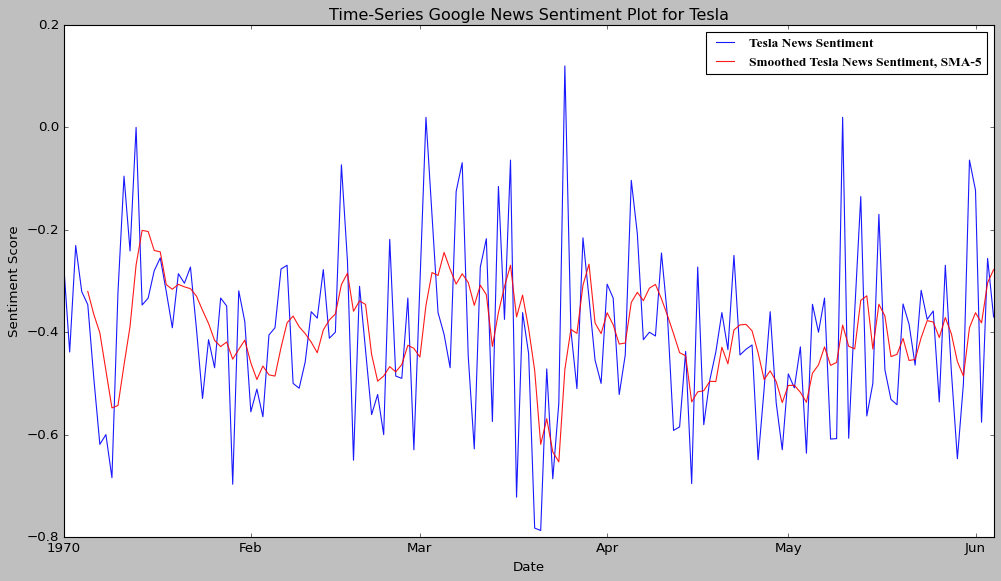

In [36]:
time_series = time_series_sentiment(df,query,5)

### Polarity Score is used to compute the sentiment score of the day given the 'POSITIVE' and 'NEGATIVE' news.

In [37]:
time_series

2025-6-30    -0.265306
2025-7-1     -0.438596
2025-7-2     -0.230769
2025-7-3     -0.320755
2025-7-4     -0.346154
                ...   
2025-11-27   -0.063830
2025-11-28   -0.122807
2025-11-29   -0.575758
2025-11-30   -0.255814
2025-12-1    -0.370370
Length: 155, dtype: float64

### Key Function 3: sentiment_analysis_df

It takes in:

1) Target asset ticker code for comparison
2) time series fed out

and plots a graph to show the relationship between news sentiment and the asset returns.
Pearson correlation coefficient is given to reflect linear correlation between the two variables.

[*********************100%***********************]  1 of 1 completed


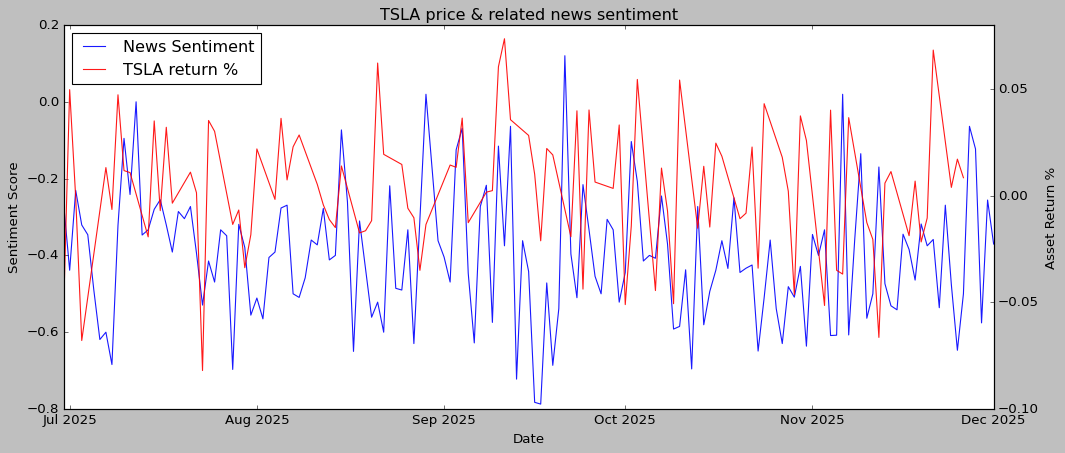

Correlation: -0.025


In [38]:
sentiment_analysis_df = sentiment_returns_analysis(time_series, ticker)

***
# LASSO Model Building & Analysis

### Key Function 4: regression_model_returns_prediction

It takes in
1) sentiment analysis dataframe
2) n_splits for TimeSeriesSplit
3) x_days_later: Return measured X days after the news is released.

then trains an optimal model with hyperparameter tuned using GridSearchCV

In [5]:
model = regression_model_returns_prediction(sentiment_analysis_df,n_splits=2,x_days_later=3)

Fitting 2 folds for each of 6 candidates, totalling 12 fits
------------------------------------------------------
The IC of the model is: 0.10919
the model is extremely useful


Fitting 2 folds for each of 6 candidates, totalling 12 fits
------------------------------------------------------
The IC of the model is: 0.00047
the model is weak
Fitting 2 folds for each of 6 candidates, totalling 12 fits
------------------------------------------------------
The IC of the model is: 0.08608
the model is extremely useful
Fitting 2 folds for each of 6 candidates, totalling 12 fits
------------------------------------------------------
The IC of the model is: 0.10919
the model is extremely useful
Fitting 2 folds for each of 6 candidates, totalling 12 fits
------------------------------------------------------
The IC of the model is: 0.03149
the model is good
Fitting 2 folds for each of 6 candidates, totalling 12 fits
------------------------------------------------------
The IC of the model is: 0.0
the model captures only random noise
Fitting 2 folds for each of 6 candidates, totalling 12 fits
------------------------------------------------------
The IC of the model i

Text(0.5, 1.0, 'Information Coefficient of model vs Difference (News published date, Returns date)')

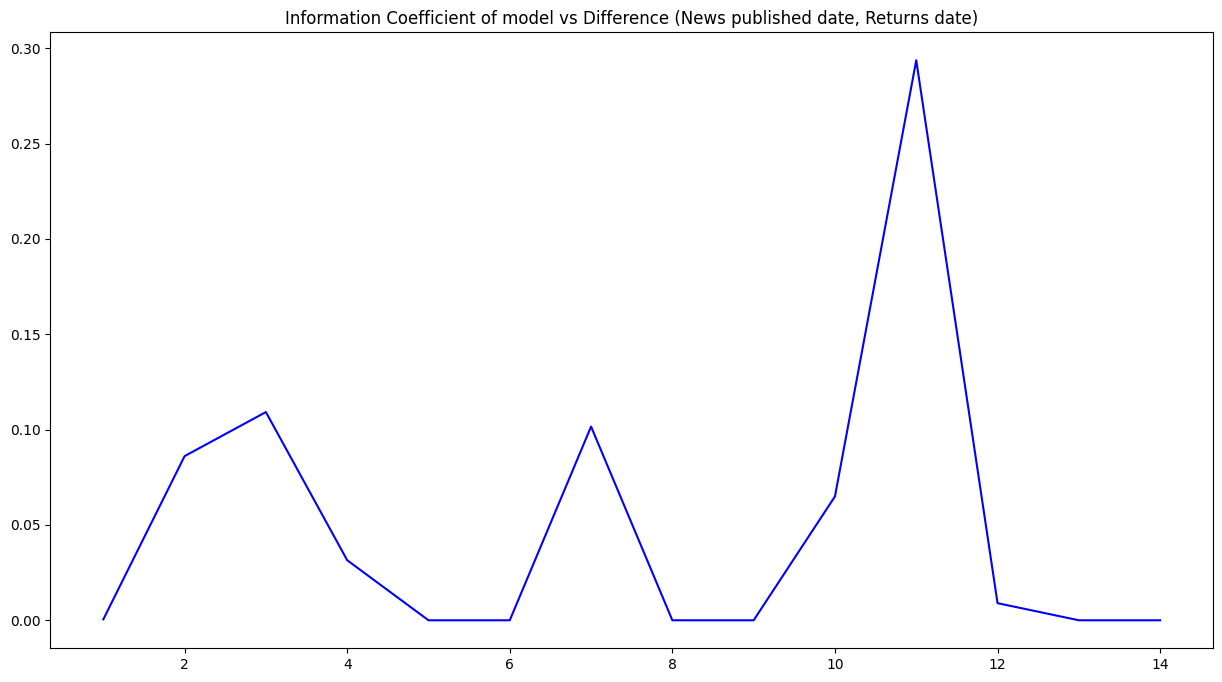

In [4]:
df = pd.Series()

for i in range(1,15):
    df[i] = regression_model_returns_prediction(sentiment_analysis_df,n_splits=2,x_days_later=i).best_score_

fig, ax = plt.subplots(figsize=(15,8))
ax.plot(df.iloc[:],color='blue',label="IC")
ax.set_title("Information Coefficient of model vs Difference (News published date, Returns date)")


In [ ]:
model.best_estimator_.named_steps['lasso'].coef_

array([0.])

***
# Extra Analysis: News Count & Volatility

### Key Function 5: news_count_series 

It takes in:

1) query
2) start_date
3) end_date

and returns the number of related news (to the query) per day in the specified period.

In [19]:
news_count_series = get_daily_news_count(query,start_date,end_date)


### Key Function 6: news_count_volatility_analysis 

It takes in:

1) the news_count_series taken from the get_daily_news_count function that gives the number of related news per day in the specified period
2) target ticker

and returns the Pearson's correlation coefficient between stock's absolute percentage return (volatility) and the number of news on a day.

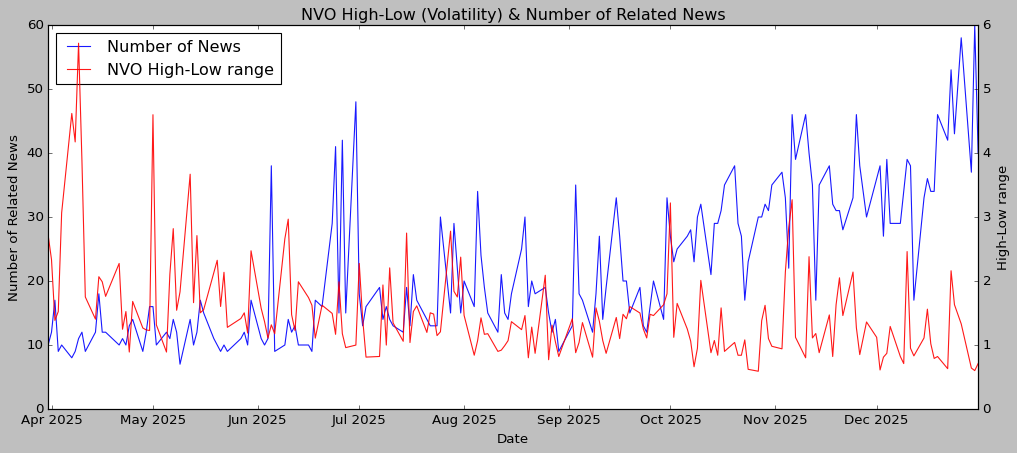

Correlation: -0.2693


In [20]:
df = news_count_volatility_analysis(news_count_series,ticker)